In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from scipy.sparse import hstack

In [2]:
df_pos = pd.read_csv('../../sample_data/comments_positive.csv')
df_neg = pd.read_csv('../../sample_data/comments_negative.csv')
df_neg['label'] = 0
df_pos['label'] = 1

In [3]:
df = pd.concat([df_neg,df_pos])
df = df.sample(frac=0.0001)

In [4]:
sample_df = df[["label","parent_text","parent_score","text"]].copy()
sample_df.parent_score = np.arcsinh(df.parent_score)
sample_df.dropna(inplace=True)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(sample_df.drop('label',axis=1), sample_df.label, test_size=0.3, random_state=42)

In [6]:
for_comm = TfidfVectorizer(max_df=4000)
comm_tfid_train = for_comm.fit_transform(x_train.text)
comm_tfid_test = for_comm.transform(x_test.text)

for_parent = TfidfVectorizer(max_df=4000)
parent_tfid_train = for_parent.fit_transform(x_train.parent_text)
parent_tfid_test = for_parent.transform(x_test.parent_text)

score_train = x_train.parent_score.values.reshape(-1,1)
score_test = x_test.parent_score.values.reshape(-1,1)

x_train = hstack([comm_tfid_train,parent_tfid_train,score_train])
x_test = hstack([comm_tfid_test,parent_tfid_test,score_test])

In [7]:
model = LinearSVC()
model.fit(x_train,y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Train Scores v")
print(accuracy_score(y_train,y_train_pred))
print(f1_score(y_train,y_train_pred))

print("Test Scores v")
print(accuracy_score(y_test,y_test_pred))
print(f1_score(y_test,y_test_pred))

Train Scores v
1.0
1.0
Test Scores v
0.875
0.8872180451127819


In [9]:
pca = PCA(n_components=120)
pca.fit(x_train,y_train)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

model = LinearSVC()
model.fit(x_train_pca,y_train)

y_train_pred = model.predict(x_train_pca)
y_test_pred = model.predict(x_test_pca)

print("Train Scores v")
print(accuracy_score(y_train,y_train_pred))
print(f1_score(y_train,y_train_pred))

print("Test Scores v")
print(accuracy_score(y_test,y_test_pred))
print(f1_score(y_test,y_test_pred))

Train Scores v
0.9428571428571428
0.948051948051948
Test Scores v
0.875
0.8854961832061069


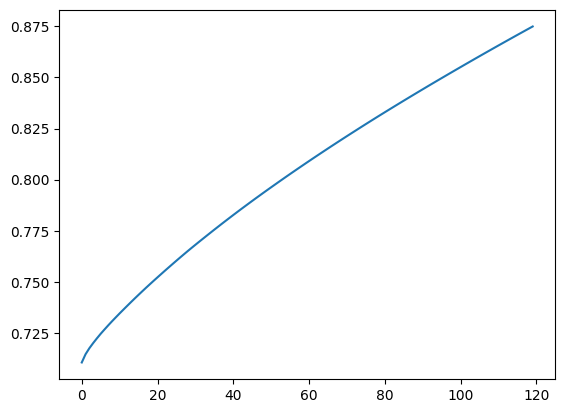

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))